# **Preproccess Data**

### **Explorasi Data**

In [5]:
# menyiapkan library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re


In [6]:
# ambil data
df = pd.read_csv("Data HateSpeech.csv")

# mengecek isi data
df.head(10)

,username,comment,label
0,dxndelin,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,__succiduous,Udah jelek brengsek pula,Ras
2,KemenagMempawah,Lucunya penghuni negeri ini selalu di hiasi da...,Agama
3,1stKOREANguy1,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras
4,newsutdofficial,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama
5,pshycosocial_,orang jelek kalo tarik tambang pasti kalah ter...,Ras
6,yangmanatautau,Lelaki melayu kuat betul insecure dengan saiz ...,Ras
7,Kyurus,@lulusikucing @otramercano Kan emg negara isla...,Netral
8,fifteennisa,@emerson_yuntho @geloraco Kadrun penyembah bal...,Agama
9,bapakkautbc_,Etdah kite2 lg yg disalahin pdhl emg bencong i...,Netral


In [7]:
df.label.value_counts()

label
Netral    836
Ras       601
Agama     563
Name: count, dtype: int64

### **Seleksi Fitur**

In [8]:
# menghilangkan fitur yang tidak dibutuhkan
df.drop(columns="username", inplace=True)

# melihat isi data
df.head()

,comment,label
0,@amyliarm lingkunganmu keknya punya pemahaman ...,Netral
1,Udah jelek brengsek pula,Ras
2,Lucunya penghuni negeri ini selalu di hiasi da...,Agama
3,"Yang jelek + miskin udah pasti bukan Kristen ,...",Ras
4,@MurtadhaOne1 Mereka memanfaatkan kebodohan ka...,Agama


### **Cleaning**

**Nilai yang Hilang**

In [9]:
df.label.unique()

array(['Netral', 'Ras', 'Agama', nan], dtype=object)

In [10]:
# mengecek apakah ada data yang hilang
df.isna().sum()

comment    3
label      4
dtype: int64

In [11]:
df.dropna(inplace=True)

df.isna().sum()

comment    0
label      0
dtype: int64

In [12]:
df.label.unique()

array(['Netral', 'Ras', 'Agama'], dtype=object)

**Data yang Terduplikat**

In [13]:
df[df.duplicated].count()

comment    54
label      54
dtype: int64

In [14]:
df[df.duplicated].head(8)

,comment,label
143,"@VIVAcoid Sudahlah,Dia mnjabat sbg menteri saj...",Netral
144,@banjarbase Agama jgn dijadikan tolak ukur lag...,Netral
269,@yonkpaws Jelek klodia ðŸ˜”ðŸ˜”,Ras
398,Ini contoh Islam yg ga bener + contoh kristen ...,Agama
452,Ka'bah islam anjing edan. Islam agama salah. h...,Agama
460,@iihjiji @GlHindu @YaqutCQoumas Selain agama g...,Agama
462,ANAK KAFIR INI!!! cuman ngelike aja padahalâ€¦...,Agama
463,Trus tak berhijab kok di-bully dan dipersekusi...,Agama


### **Case Folding**

In [15]:
# akan mengembalikan text yang sudah di case folding
def case_folding(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'\n+', '', text)
    text = re.sub(r'\r+', '', text)
    text = re.sub(r'\d+', '', text)

    text = text.translate(str.maketrans("", "", string.punctuation))

    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U00010000-\U0010ffff"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r"", text)

    return text.lower()

df.comment = df.comment.apply(case_folding)

df.comment.head()


0     lingkunganmu keknya punya pemahaman kl anak p...
1                             udah jelek brengsek pula
2    lucunya penghuni negeri ini selalu di hiasi da...
3    yang jelek  miskin udah pasti bukan kristen  t...
4     mereka memanfaatkan kebodohan kadrun melalui ...
Name: comment, dtype: object

### **Tokenize**

In [16]:
# akan mengembalikan text yang sudah di tokenize
def tokenize(text):
    return word_tokenize(text)

df.comment = df.comment.apply(tokenize)
df.comment.head()

0    [lingkunganmu, keknya, punya, pemahaman, kl, a...
1                        [udah, jelek, brengsek, pula]
2    [lucunya, penghuni, negeri, ini, selalu, di, h...
3    [yang, jelek, miskin, udah, pasti, bukan, kris...
4    [mereka, memanfaatkan, kebodohan, kadrun, mela...
Name: comment, dtype: object

### **Normalize**

In [17]:
# kata yang harus dinormalize
norm_word = {
    "emg" : "memang",
    "saiz" : "size",
    "cino" : "cina",
    "jowo" : "jawa",
    "kite" : "kita",
    "lg" : "lagi",
    "aj" : "aja",
    "yg" : "yang",
    "pdhl" : "padahal",
    "napa" : "kenapa",
    "dh" : "sudah",
    "udh" : "sudah",
    "tdk" : "tidak",
    "sm" : "sama",
    "ga" : "tidak",
    "bgt" : "banget",
    "mentri" : "menteri",
    "embantu" : "membantu",
    "dlm" : "dalam",
    "bdang" : "bidang",
    "msh" : "masih",
    "ampe" : "sampai",
    "ky" : "kaya",
    "nnya" : "tanya",
    "krn" : "karena",
    "jir" : "anjing",
    "ajg" : "anjing",
    "anjir" : "anjing",
    "gak" : "tidak",
    "ak" : "aku",
    "dasr" : "dasar",
    "lgsg" : "langsung",
    "skrg" : "sekarang",
    "gw" : "gua",
    "w" : "gua",
    "engga" : "tidak",
    "dgn" : "dengan",
    "orng" : "orang",
    "org" : "orang",
    "ni" : "ini",
    "jgn" : "jangan",
    "mbahas" : "bahas",
    "krna" : "karena",
    "ma" : "sama",
    "sblm" : "sebelum",
    "tp" : "tapi",
    "sbg" : "sebagai",
    "kl" : "kalau"
}

# mengembalikan text yang sudah dinormalisasi 
def normalize(text):
    return [norm_word[word] if word in norm_word else word for word in text]

df.comment = df.comment.apply(normalize)
df.comment.head()

0    [lingkunganmu, keknya, punya, pemahaman, kalau...
1                        [udah, jelek, brengsek, pula]
2    [lucunya, penghuni, negeri, ini, selalu, di, h...
3    [yang, jelek, miskin, udah, pasti, bukan, kris...
4    [mereka, memanfaatkan, kebodohan, kadrun, mela...
Name: comment, dtype: object

### **Menghilangkan Stopwords** 

In [18]:
stopw = stopwords.words("indonesian")

# mengembalikan text yang sudah di stopwords
def stopword(text):
    return [word for word in text if word not in stopw]

df.comment = df.comment.apply(stopword)
df.comment.head()

0    [lingkunganmu, keknya, pemahaman, anak, punk, ...
1                              [udah, jelek, brengsek]
2    [lucunya, penghuni, negeri, hiasi, diwarnai, p...
3    [jelek, miskin, udah, kristen, cantikpinterjag...
4      [memanfaatkan, kebodohan, kadrun, berita, hoax]
Name: comment, dtype: object

### **Stemming**

In [19]:
stemmer = StemmerFactory().create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

df.comment = df.comment.apply(stemming)
df.comment.head()

0    [lingkung, kek, paham, anak, punk, tuh, jelek,...
1                              [udah, jelek, brengsek]
2    [lucu, huni, negeri, hias, warna, politik, ide...
3    [jelek, miskin, udah, kristen, cantikpinterjag...
4               [manfaat, bodoh, kadrun, berita, hoax]
Name: comment, dtype: object

### **Kemunculan Data**

In [20]:
df.head()

,comment,label
0,"[lingkung, kek, paham, anak, punk, tuh, jelek,...",Netral
1,"[udah, jelek, brengsek]",Ras
2,"[lucu, huni, negeri, hias, warna, politik, ide...",Agama
3,"[jelek, miskin, udah, kristen, cantikpinterjag...",Ras
4,"[manfaat, bodoh, kadrun, berita, hoax]",Agama


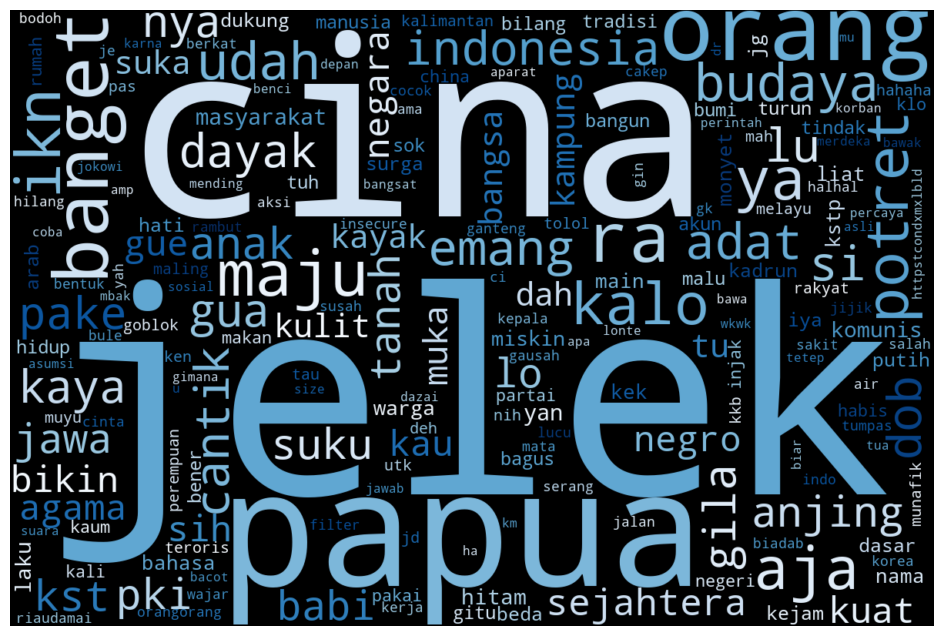

In [21]:
from wordcloud.wordcloud import WordCloud


def showing(wc):
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show 

allword = "".join([str(text).replace("'", "") for text in df.comment[df.label == "Ras"]])

word_cloud = WordCloud(
    height=800,
    width=1200,
    collocations=False,
    colormap="Blues_r"
).generate(allword)

showing(word_cloud)

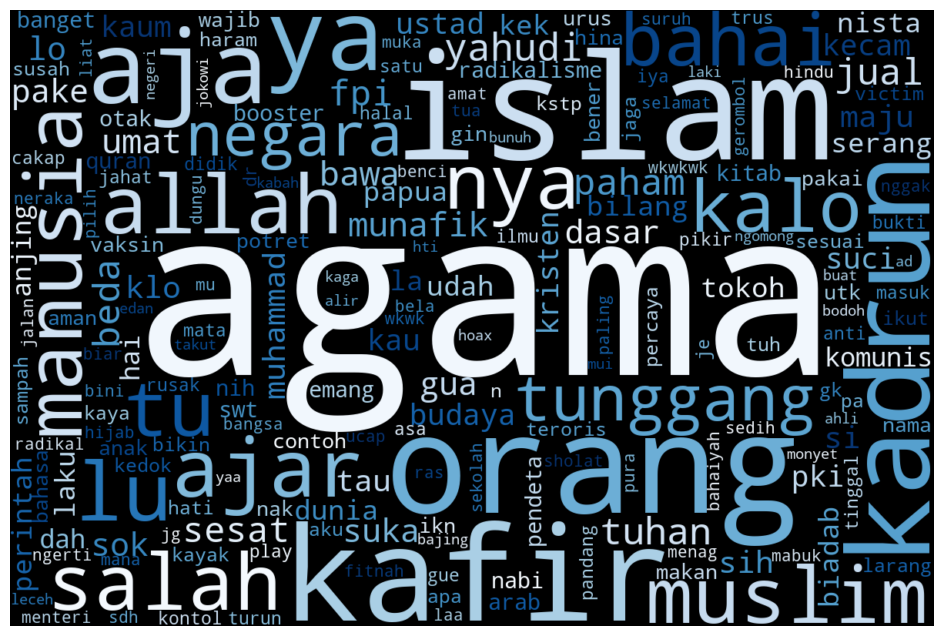

In [22]:
from wordcloud.wordcloud import WordCloud


def showing(wc):
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show 

allword = "".join([str(text).replace("'", "") for text in df.comment[df.label == "Agama"]])

word_cloud = WordCloud(
    height=800,
    width=1200,
    collocations=False,
    colormap="Blues_r"
).generate(allword)

showing(word_cloud)

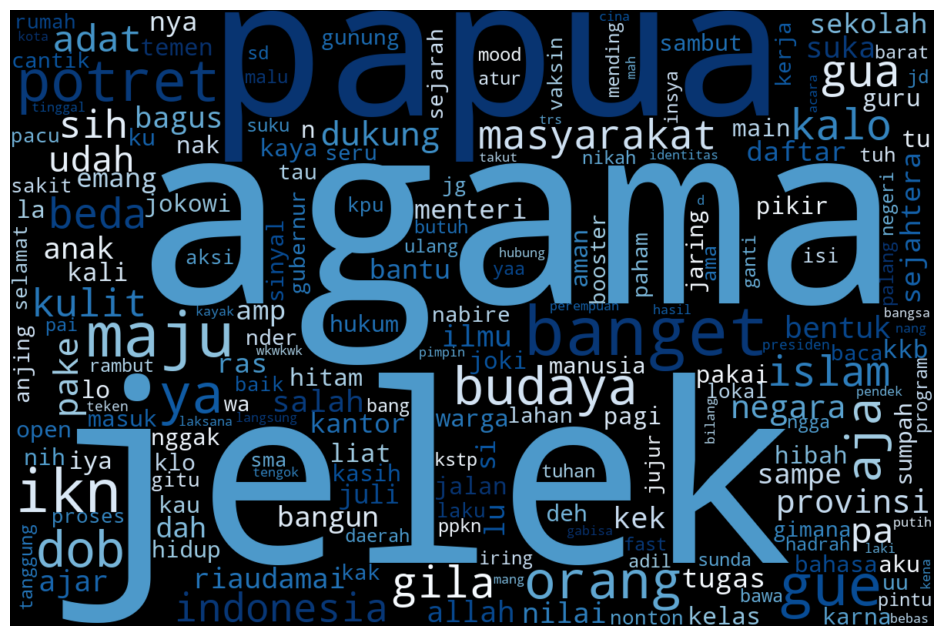

In [23]:
from wordcloud.wordcloud import WordCloud


def showing(wc):
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show 

allword = "".join([str(text).replace("'", "") for text in df.comment[df.label == "Netral"]])

word_cloud = WordCloud(
    height=800,
    width=1200,
    collocations=False,
    colormap="Blues_r"
).generate(allword)

showing(word_cloud)

In [357]:
all_word_ras = [str(item).replace("'", "") for sublist in df.comment[df.label == "Ras"] for item in sublist]
all_word_agama = [str(item).replace("'", "") for sublist in df.comment[df.label == "Agama"] for item in sublist]
all_word_netral = [str(item).replace("'", "") for sublist in df.comment[df.label == "Netral"] for item in sublist]

all_words = pd.DataFrame([all_word_ras, all_word_agama, all_word_netral]).transpose()
all_words.columns = ["Ras", "Agama", "Netral"]
all_words

,Ras,Agama,Netral
0,udah,lucu,lingkung
1,jelek,huni,kek
2,brengsek,negeri,paham
3,jelek,hias,anak
4,miskin,warna,punk
...,...,...,...
7830,None,None,satu
7831,None,None,indonesia
7832,None,None,beda
7833,None,None,suku


In [359]:
all_words.to_csv("all_word_data.csv", index=False)

In [370]:
comment = df.comment.tolist()
comment_df = pd.DataFrame(comment)
comment_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,lingkung,kek,paham,anak,punk,tuh,jelek,y,kesan,gitu,...,None,None,None,None,None,None,None,None,None,None
1,udah,jelek,brengsek,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,lucu,huni,negeri,hias,warna,politik,identitassehingga,kesan,mabok,agamaada,...,None,None,None,None,None,None,None,None,None,None
3,jelek,miskin,udah,kristen,cantikpinterjago,nuyanyicino,jawa,jago,masakkaya,udah,...,None,None,None,None,None,None,None,None,None,None
4,manfaat,bodoh,kadrun,berita,hoax,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ikn,potret,maju,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1996,ajar,orang,cina,hidup,numpang,pelit,kontribusi,bangsa,None,None,...,None,None,None,None,None,None,None,None,None,None
1997,paham,wahabi,rebak,paham,agama,tekstual,pokok,bidah,bidah,bidah,...,None,None,None,None,None,None,None,None,None,None
1998,hidup,negara,pancasila,mengplementasikan,sila,pancasila,satu,indonesia,beda,suku,...,None,None,None,None,None,None,None,None,None,None


In [371]:
comment_df.to_csv("last_comment.csv")

# **Pembobotan Kata**

In [24]:
combined_text = [" ".join(text) for text in df.comment]
sentences = []
word_set = []
 
for sent in combined_text:
    x = [i for i in word_tokenize(sent) if i.isalpha()]
    sentences.append(x)
    for word in x:
        if word not in word_set:
            word_set.append(word)
 
#Set of vocab 
word_set = set(word_set)
#Total documents in our corpus
total_documents = len(sentences)
 
#Creating an index for each word in our vocab.
index_dict = {} #Dictionary to store index for each word
i = 0
for word in word_set:
    index_dict[word] = i
    i += 1


word_set
            

{'httpstcoijgvk',
 'kenal',
 'hub',
 'nggih',
 'singkir',
 'orange',
 'didik',
 'budha',
 'httpstcoxooqbmcvr',
 'gagal',
 'boko',
 'menghornati',
 'john',
 'httpstcobdawo',
 'jaffrian',
 'kenceng',
 'sipit',
 'record',
 'torang',
 'dampak',
 'httpstcozllafna',
 'ansel',
 'adl',
 'ukur',
 'aduhaaiiii',
 'httpstcopgbooyd',
 'radikul',
 'inget',
 'httpstcoqeqdaukm',
 'kakk',
 'httpstcozalvvmeam',
 'nenek',
 'syiah',
 'nyonya',
 'durhaka',
 'alir',
 'stranger',
 'tameng',
 'aring',
 'kultural',
 'nulis',
 'pesan',
 'aparat',
 'httpstcobowxeynxhe',
 'bmr',
 'httpstconswhqhsrx',
 'patriark',
 'hti',
 'allah',
 'gua',
 'beruntus',
 'ammara',
 'httpstcoannssiu',
 'gelap',
 'dob',
 'bahasa',
 'biased',
 'transaksi',
 'bedain',
 'cok',
 'pelit',
 'stigma',
 'muharram',
 'party',
 'bigul',
 'pantai',
 'kenyang',
 'ganti',
 'gabener',
 'httpstcortdjgzx',
 'pumpung',
 'menciptakanmengadakan',
 'ahli',
 'httpstcoznmdwqefg',
 'monas',
 'jilid',
 'selingkuh',
 'ido',
 'otak',
 'brojdi',
 'gaduh',
 'ta

In [25]:
def count_dict(sentences):
    word_count = {}
    for word in word_set:
        word_count[word] = 0
        for sent in sentences:
            if word in sent:
                word_count[word] += 1
    return word_count

word_count = count_dict(sentences)
word_count


{'httpstcoijgvk': 1,
 'kenal': 4,
 'hub': 1,
 'nggih': 1,
 'singkir': 2,
 'orange': 1,
 'didik': 12,
 'budha': 1,
 'httpstcoxooqbmcvr': 1,
 'gagal': 2,
 'boko': 2,
 'menghornati': 4,
 'john': 2,
 'httpstcobdawo': 1,
 'jaffrian': 1,
 'kenceng': 2,
 'sipit': 2,
 'record': 3,
 'torang': 1,
 'dampak': 2,
 'httpstcozllafna': 1,
 'ansel': 1,
 'adl': 2,
 'ukur': 4,
 'aduhaaiiii': 1,
 'httpstcopgbooyd': 1,
 'radikul': 1,
 'inget': 5,
 'httpstcoqeqdaukm': 1,
 'kakk': 1,
 'httpstcozalvvmeam': 1,
 'nenek': 1,
 'syiah': 3,
 'nyonya': 1,
 'durhaka': 1,
 'alir': 5,
 'stranger': 1,
 'tameng': 1,
 'aring': 1,
 'kultural': 1,
 'nulis': 3,
 'pesan': 6,
 'aparat': 6,
 'httpstcobowxeynxhe': 1,
 'bmr': 2,
 'httpstconswhqhsrx': 1,
 'patriark': 2,
 'hti': 5,
 'allah': 42,
 'gua': 57,
 'beruntus': 1,
 'ammara': 2,
 'httpstcoannssiu': 1,
 'gelap': 3,
 'dob': 71,
 'bahasa': 24,
 'biased': 1,
 'transaksi': 2,
 'bedain': 1,
 'cok': 2,
 'pelit': 1,
 'stigma': 1,
 'muharram': 1,
 'party': 1,
 'bigul': 1,
 'pantai':

### **Term Frequency**

In [26]:
def termfreq(document, word):
    N = len(document)
    occurance = len([token for token in document if token==word])
    return occurance/N



### **Inverse Document Frequently**

In [27]:
def inverse_doc_freq(word):
    try:
        word_occurance = word_count[word] + 1
    except:
        word_occurance = 1
    return np.log(total_documents/word_occurance)



### **TF-IDF**

In [28]:
def tfidf_func(sentences):
    tf_idf_vec = np.zeros((len(word_set),))
    for word in sentences:
        tf = termfreq(sentences, word)
        idf = inverse_doc_freq(word)

        value = tf*idf 
        tf_idf_vec[index_dict[word]] = value
    return tf_idf_vec

In [29]:
len(word_set)

6058

In [246]:
vectors = []
for sent in sentences:
    vec = tfidf_func(sent)
    vectors.append(vec)

tf_idf = pd.DataFrame(vectors, columns=list(word_set))
tf_idf

,httpstcoijgvk,kenal,hub,nggih,singkir,orange,didik,budha,httpstcoxooqbmcvr,gagal,...,perut,pendidika,busuk,sebahagian,sosio,httpstcorxbjhkoq,jepangbetawi,provinsi,masyarakatadat,httpstcojnbxbtda
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
tf_idf.sosio.mean()

0.0004934110913558669

### **Feature Selection** 

In [248]:
uncommon_word = []
index_word = []
for i, col in enumerate(tf_idf.columns):
    if tf_idf[col].mean() < 0.008:
        index_word.append(i)
        uncommon_word.append(col)

# tf_idf.drop(columns=uncommon_word, inplace=True)
uncommon_word

['httpstcoijgvk',
 'kenal',
 'hub',
 'nggih',
 'singkir',
 'orange',
 'didik',
 'budha',
 'httpstcoxooqbmcvr',
 'gagal',
 'boko',
 'menghornati',
 'john',
 'httpstcobdawo',
 'jaffrian',
 'kenceng',
 'sipit',
 'record',
 'torang',
 'dampak',
 'httpstcozllafna',
 'ansel',
 'adl',
 'ukur',
 'aduhaaiiii',
 'httpstcopgbooyd',
 'radikul',
 'inget',
 'httpstcoqeqdaukm',
 'kakk',
 'httpstcozalvvmeam',
 'nenek',
 'syiah',
 'nyonya',
 'durhaka',
 'alir',
 'stranger',
 'tameng',
 'aring',
 'kultural',
 'nulis',
 'pesan',
 'aparat',
 'httpstcobowxeynxhe',
 'bmr',
 'httpstconswhqhsrx',
 'patriark',
 'hti',
 'beruntus',
 'ammara',
 'httpstcoannssiu',
 'gelap',
 'bahasa',
 'biased',
 'transaksi',
 'bedain',
 'cok',
 'pelit',
 'stigma',
 'muharram',
 'party',
 'bigul',
 'pantai',
 'kenyang',
 'ganti',
 'gabener',
 'httpstcortdjgzx',
 'pumpung',
 'menciptakanmengadakan',
 'ahli',
 'httpstcoznmdwqefg',
 'monas',
 'jilid',
 'selingkuh',
 'ido',
 'otak',
 'brojdi',
 'gaduh',
 'taro',
 'br',
 'fetish',
 'h

In [360]:
tf_idf.to_csv("last_tfidf.csv", index=False)

# **Modeling**

In [303]:
class KNN:
    def __init__(self, n_neighbors=3, weight="uniform", distance_metric="euclidean", p=2):
        self.n_neighbors = n_neighbors
        self.weight = weight
        self.distance_metric = distance_metric
        self.p = p  
        self.x = None
        self.y = None

    def fit(self, x, y):
        if len(x) != len(y):
            raise f"length of x is different with length of y, x = ({len(x)}) and y = ({len(y)})"
        
        self.x = np.array(x)
        self.y = np.array(y)

    def predict(self, x_predict):
        x_predict = np.array(x_predict)
        predicted = [self._predict(x) for x in x_predict]
        return np.array(predicted)

    def _predict(self, x):
        if self.distance_metric == "euclidean":
            distance = np.sqrt(np.sum((self.x - x) ** 2, axis=1))
        elif self.distance_metric == "manhattan":
            distance = np.sum(np.abs(self.x - x), axis=1)
        elif self.distance_metric == "minkowski":
            distance = np.sum(np.abs(self.x - x) ** self.p, axis=1) ** (1 / self.p)
        else:
            raise ValueError(f"Unknown distance metric: {self.distance_metric}")
        
        nearest = np.argpartition(distance, self.n_neighbors)[:self.n_neighbors]
        labels = [self.y[i] for i in nearest]

        if self.weight == "uniform":
            return np.bincount(labels).argmax()
        
        if self.weight == "distance":
            weight = [(1/(distance[i]+1e-10)) for i in nearest]
            return np.bincount(labels, weights=weight).argmax()
        
        raise ValueError("Can only use 'uniform' or 'distance' for weight")

    def accuracy(self, y_pred, y_true):
        return np.sum(y_pred == y_true) / len(y_true)


### **Training**

In [304]:
def Train_Test_Split (x, y, random_seed=None, test_size=0.2):
    n = len(x)
    if random_seed:
        np.random.seed(random_seed)

    test_size = int(test_size * n)
    indices = np.random.permutation(n)
    train_indices, test_indices = indices[test_size:], indices[:test_size]
    return x.iloc[train_indices], x.iloc[test_indices], y[train_indices], y[test_indices]

label_ = {df.label.unique()[i] : i for i in range(len(df.label.unique()))}
y = np.array([label_[label] for label in df["label"]])

X_train, X_test, y_train, y_test = Train_Test_Split(tf_idf, y, random_seed=42)
X_train

,httpstcoijgvk,kenal,hub,nggih,singkir,orange,didik,budha,httpstcoxooqbmcvr,gagal,...,perut,pendidika,busuk,sebahagian,sosio,httpstcorxbjhkoq,jepangbetawi,provinsi,masyarakatadat,httpstcojnbxbtda
968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
np.array(X_test)[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [306]:
model = KNN(n_neighbors=3)

In [307]:
model.fit(X_train, y_train)



In [308]:
y_predict = model.predict(X_test)

y_predict

array([0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,

In [309]:
model.accuracy(y_predict, y_test)

0.4775

In [310]:
accuracies = {}

for i in range(2,15):
    model = KNN(n_neighbors=i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracies[i] = model.accuracy(y_predict, y_test)


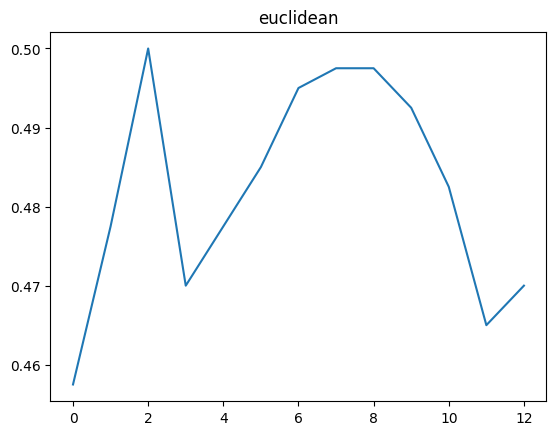

In [311]:
plt.title("euclidean")
plt.plot(accuracies.values())

In [316]:
accuracies_manhattan = {}

for i in range(2,15):
    model = KNN(n_neighbors=i, distance_metric="manhattan")
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracies_manhattan[i] = model.accuracy(y_predict, y_test)

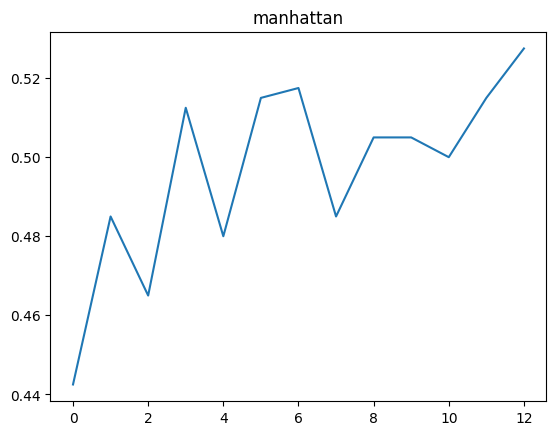

In [317]:
plt.title("manhattan")
plt.plot(accuracies_manhattan.values())

In [321]:
accuracies_minowski_1 = {}

for i in range(2,15):
    model = KNN(n_neighbors=i, distance_metric="minkowski", p=1)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracies_minowski_1[i] = model.accuracy(y_predict, y_test)

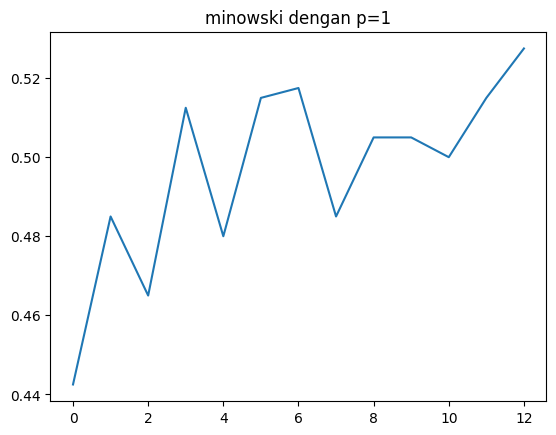

In [322]:
plt.title("minowski dengan p=1")
plt.plot(accuracies_minowski_1.values())

In [323]:
accuracies_minowski_2 = {}

for i in range(2,15):
    model = KNN(n_neighbors=i, distance_metric="minkowski", p=2)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracies_minowski_2[i] = model.accuracy(y_predict, y_test)

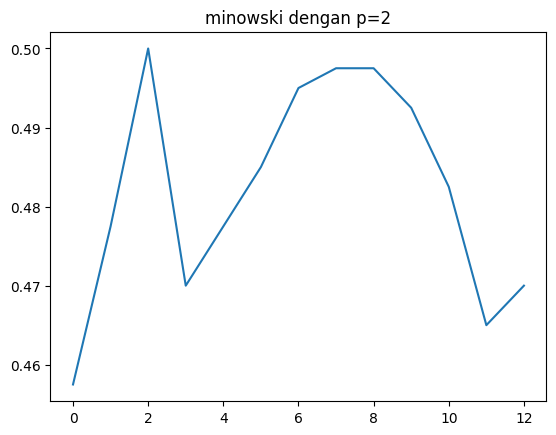

In [324]:
plt.title("minowski dengan p=2")
plt.plot(accuracies_minowski_2.values())

In [325]:
accuracies_minowski_3 = {}

for i in range(2,15):
    model = KNN(n_neighbors=i, distance_metric="minkowski", p=3)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracies_minowski_3[i] = model.accuracy(y_predict, y_test)

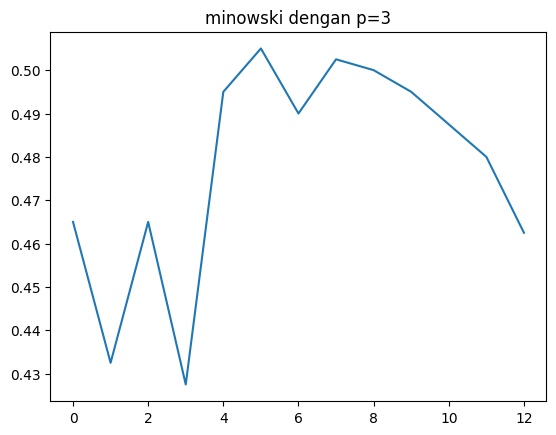

In [326]:
plt.title("minowski dengan p=3")
plt.plot(accuracies_minowski_3.values())

In [331]:
accuracies_manhattan

{2: 0.4425,
 3: 0.485,
 4: 0.465,
 5: 0.5125,
 6: 0.48,
 7: 0.515,
 8: 0.5175,
 9: 0.485,
 10: 0.505,
 11: 0.505,
 12: 0.5,
 13: 0.515,
 14: 0.5275}

In [335]:
model = KNN(n_neighbors=7, distance_metric="manhattan", weight="distance")
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.accuracy(y_predict, y_test)

0.535